In [22]:
#importing required libraries
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import minmax_scale
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#loading dataset
df=pd.read_clipboard()

In [4]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [10]:
df.rename(columns={'Genre':'gender'},inplace=True)

In [13]:
df['gender']=df['gender'].map({'Male':1,'Female':0})

In [14]:
df

,CustomerID,gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [52]:
df.isnull().sum()

CustomerID                0
gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
cluster                   0
dtype: int64

In [17]:
#to find suitable clusters using elbow method
w=[]
q=[]
for i in range(1,10,1):
    k=KMeans(i)
    k.fit(df)
    w.append(k.inertia_)
    q.append(i)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [18]:
w

[975512.0599999999,
 387065.71377137717,
 271384.508782868,
 195401.19855991466,
 157168.30001515942,
 122601.93746732261,
 103213.90438353918,
 86053.67444777445,
 76986.84475282219]

In [19]:
q

[1, 2, 3, 4, 5, 6, 7, 8, 9]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

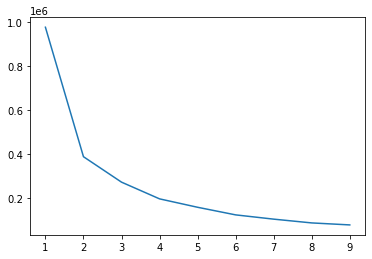

In [23]:
sns.lineplot(q,w)

In [25]:
# After 4th cluster squared err slightly dropped 

In [29]:
km=KMeans(n_clusters=4)

In [40]:
predicted_cat=km.fit_predict(df)
df['cluster']=predicted_cat

In [33]:
center=km.cluster_centers_

In [36]:
center

array([[164.        ,   0.52777778,  40.80555556,  87.91666667,
         17.88888889],
       [ 30.06779661,   0.37288136,  36.10169492,  29.86440678,
         49.86440678],
       [162.        ,   0.46153846,  32.69230769,  86.53846154,
         82.12820513],
       [ 92.48484848,   0.43939394,  43.87878788,  57.72727273,
         49.25757576]])

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

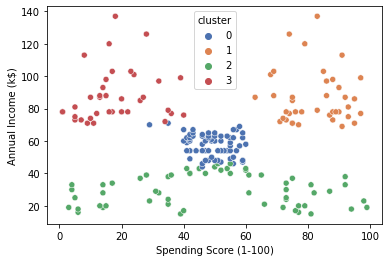

In [50]:
sns.scatterplot(x=df['Spending Score (1-100)'],y=df['Annual Income (k$)'],hue=df['cluster'],palette='deep')

In [51]:
df

,CustomerID,gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,1,19,15,39,2
1,2,1,21,15,81,2
2,3,0,20,16,6,2
3,4,0,23,16,77,2
4,5,0,31,17,40,2
...,...,...,...,...,...,...
195,196,0,35,120,79,1
196,197,0,45,126,28,3
197,198,1,32,126,74,1
198,199,1,32,137,18,3


## Unsupervised machine learning clustering the dataset into the 4 groups accordingly company plan the marketing 